In [200]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [201]:
df=pd.read_csv(r"C:\Users\User\Desktop\Raj\Breast_cancer_data.csv")

In [202]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [203]:
df.isnull().count()

mean_radius        569
mean_texture       569
mean_perimeter     569
mean_area          569
mean_smoothness    569
diagnosis          569
dtype: int64

In [204]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

<AxesSubplot:>

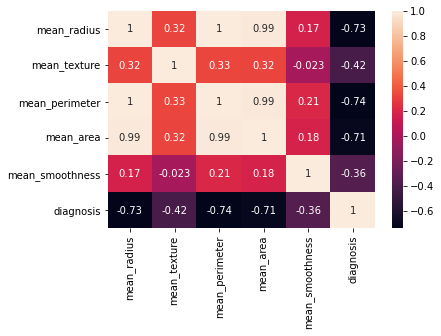

In [205]:
sns.heatmap(df.corr(),annot=True)

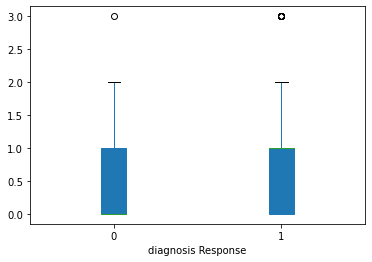

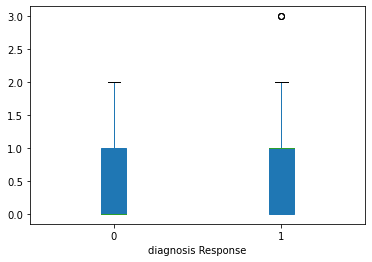

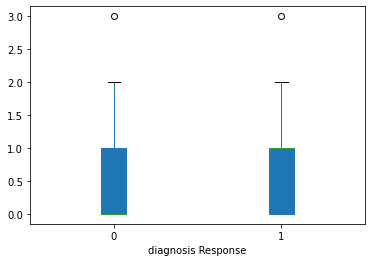

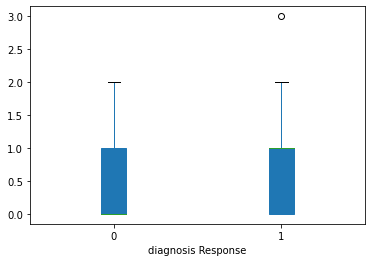

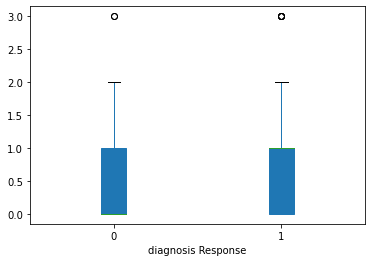

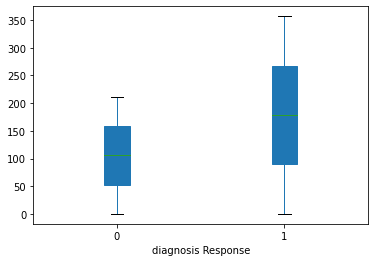

In [206]:
for i in df.columns:
    pd.crosstab(df[i],df.diagnosis).plot(kind="box",patch_artist=True)
    plt.xlabel("diagnosis Response")

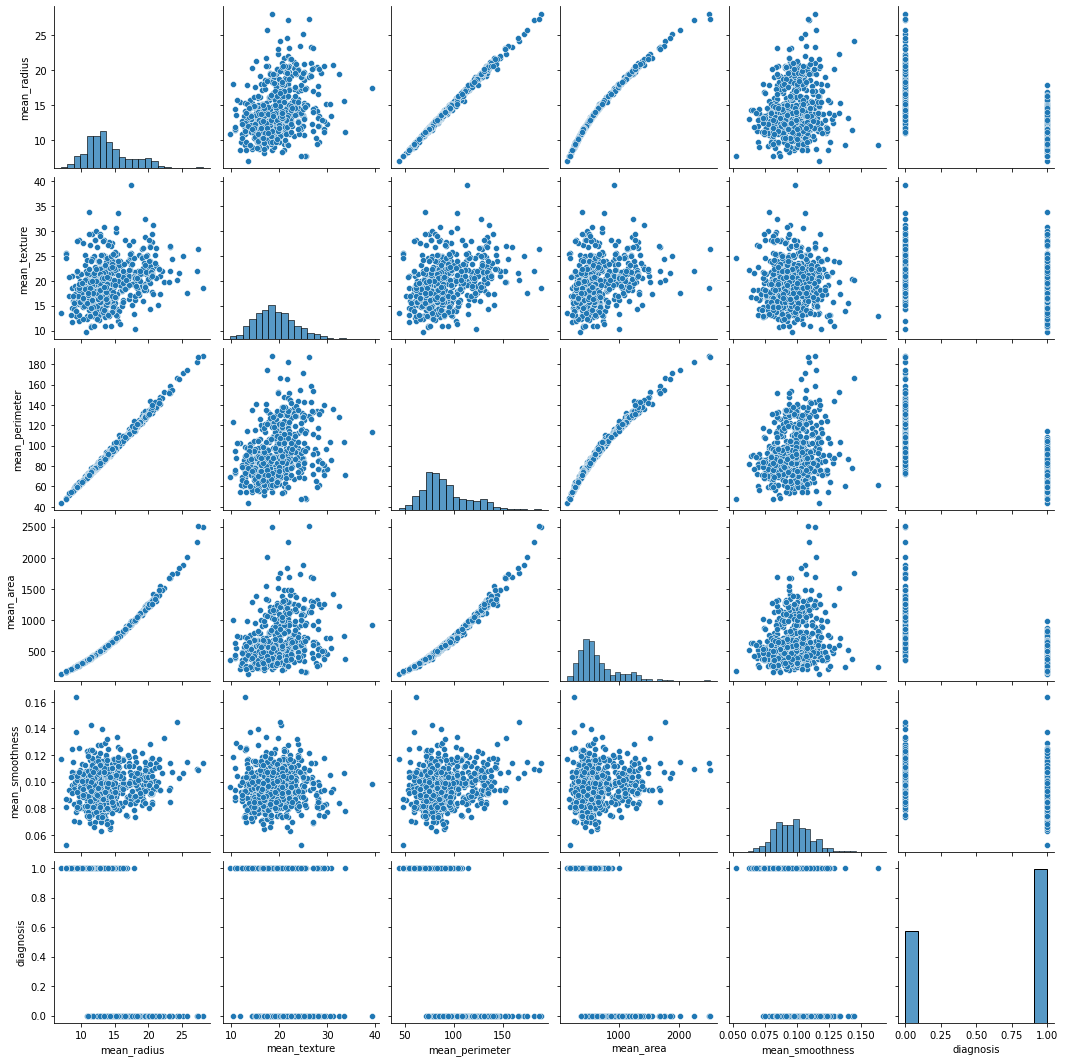

In [207]:
sns.pairplot(df)

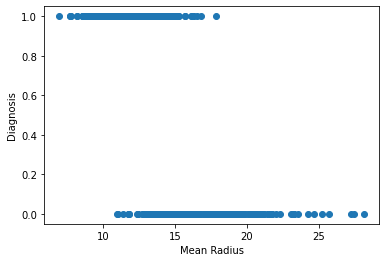

In [208]:
plt.scatter(df.mean_radius,df.diagnosis)
plt.xlabel("Mean Radius")
plt.ylabel("Diagnosis")
plt.show()

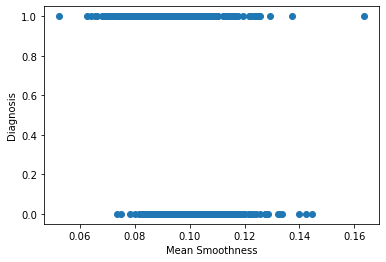

In [209]:
plt.scatter(df.mean_smoothness,df.diagnosis)
plt.xlabel("Mean Smoothness")
plt.ylabel("Diagnosis")
plt.show()

In [210]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [211]:
x=df.drop(["diagnosis"],axis="columns")
y=df.diagnosis

In [212]:
x.shape,y.shape

((569, 5), (569,))

In [213]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [214]:
x_train.shape,y_train.shape

((426, 5), (426,))

In [215]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(class_weight='balanced',max_iter=500)
reg.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [216]:
y_pred=reg.predict(x_test)

In [217]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average='weighted')

0.8963144963144964

In [218]:
para_dict={
    'penalty' : [11,12,'elasticnet', 'none'],
    'class_weight' : ["dict", "balanced"],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class' : ['auto', 'ovr', 'multinomial'] 
}

In [219]:
from sklearn.model_selection import  GridSearchCV
grid=GridSearchCV(reg,param_grid=para_dict,cv=10,n_jobs=-1)

In [220]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=500),
             n_jobs=-1,
             param_grid={'class_weight': ['dict', 'balanced'],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': [11, 12, 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [221]:
grid.best_score_

0.9435769656699889

In [196]:
grid.best_estimator_

LogisticRegression(class_weight='dict', max_iter=500, penalty='none',
                   solver='newton-cg')

In [197]:
from sklearn import tree
reg1=tree.DecisionTreeClassifier()
reg1.fit(x_train,y_train)

DecisionTreeClassifier()

In [198]:
reg1_pred=reg1.predict(x_test)

In [199]:
f1_score(y_test,reg1_pred, average='weighted')

0.8747078727723889